In [1]:
import numpy as np
import pandas as pd
import re

file1 = open('file.csv', 'r',encoding='utf-8')
Lines = file1.readlines()

for i in range(len(Lines)):
    ingredients = Lines[i].split('/food/')[1:]
    for x in range(len(ingredients)):
        ingredients[x] = re.sub(r'\n', '', ingredients[x])
        ingredients[x] = re.sub(r',', '', ingredients[x])
    Lines[i] = ingredients

In [2]:
import matplotlib.pyplot as plt

In [3]:
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Embedding
from keras.layers import LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.models import Model
from sklearn.model_selection import train_test_split

In [4]:
recipes = pd.DataFrame({'Recipes':Lines})
recipes['Ingredient'] = ['']*len(recipes)
for i in range(len(recipes)):
    recipes['Recipes'][i]  = pd.unique(recipes['Recipes'][i])
recipes['Recipes'] = recipes['Recipes'].astype(str)
recipes['Recipes'] = recipes['Recipes'].str.replace('[','')
recipes['Recipes'] = recipes['Recipes'].str.replace(']','')
recipes['Recipes'] = recipes['Recipes'].str.replace("'","")
recipes['Recipes'] = recipes['Recipes'].str.replace("\n","")
recipes

C:\Users\eleon\AppData\Local\Temp\ipykernel_20952\880286790.py:4: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  recipes['Recipes'][i]  = pd.unique(recipes['Recipes'][i])
C:\Users\eleon\AppData\Local\Temp\ipykernel_20952\880286790.py:4: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  recipes['Recipes'][i]  = pd.unique(recipes['Recipes'][i])
C:\Users\eleon\AppData\Local\Temp\ipykernel_20952\880286790.py:4: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  recipes['Recipes'][i]  = pd.unique(recipes['Recipes'][i])
C:\Users\eleon\AppData\Local\Temp\ipykernel_20952\880286790.py:4: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is depreca

C:\Users\eleon\AppData\Local\Temp\ipykernel_20952\880286790.py:4: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  recipes['Recipes'][i]  = pd.unique(recipes['Recipes'][i])
C:\Users\eleon\AppData\Local\Temp\ipykernel_20952\880286790.py:4: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  recipes['Recipes'][i]  = pd.unique(recipes['Recipes'][i])
C:\Users\eleon\AppData\Local\Temp\ipykernel_20952\880286790.py:4: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  recipes['Recipes'][i]  = pd.unique(recipes['Recipes'][i])
C:\Users\eleon\AppData\Local\Temp\ipykernel_20952\880286790.py:4: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is depreca

C:\Users\eleon\AppData\Local\Temp\ipykernel_20952\880286790.py:4: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  recipes['Recipes'][i]  = pd.unique(recipes['Recipes'][i])
C:\Users\eleon\AppData\Local\Temp\ipykernel_20952\880286790.py:4: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  recipes['Recipes'][i]  = pd.unique(recipes['Recipes'][i])
C:\Users\eleon\AppData\Local\Temp\ipykernel_20952\880286790.py:4: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  recipes['Recipes'][i]  = pd.unique(recipes['Recipes'][i])
C:\Users\eleon\AppData\Local\Temp\ipykernel_20952\880286790.py:4: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is depreca

C:\Users\eleon\AppData\Local\Temp\ipykernel_20952\880286790.py:4: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  recipes['Recipes'][i]  = pd.unique(recipes['Recipes'][i])
C:\Users\eleon\AppData\Local\Temp\ipykernel_20952\880286790.py:4: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  recipes['Recipes'][i]  = pd.unique(recipes['Recipes'][i])
C:\Users\eleon\AppData\Local\Temp\ipykernel_20952\880286790.py:4: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  recipes['Recipes'][i]  = pd.unique(recipes['Recipes'][i])
C:\Users\eleon\AppData\Local\Temp\ipykernel_20952\880286790.py:4: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is depreca

C:\Users\eleon\AppData\Local\Temp\ipykernel_20952\880286790.py:4: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  recipes['Recipes'][i]  = pd.unique(recipes['Recipes'][i])
C:\Users\eleon\AppData\Local\Temp\ipykernel_20952\880286790.py:4: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  recipes['Recipes'][i]  = pd.unique(recipes['Recipes'][i])
C:\Users\eleon\AppData\Local\Temp\ipykernel_20952\880286790.py:4: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  recipes['Recipes'][i]  = pd.unique(recipes['Recipes'][i])
C:\Users\eleon\AppData\Local\Temp\ipykernel_20952\880286790.py:4: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is depreca

,Recipes,Ingredient
0,egg_yolk garlic lemon black_pepper olive_oil m...,
1,olive_oil onion carrot celery garlic white_win...,
2,vegetable_oil onion garlic thyme scotch_bonnet...,
3,oil onion lamb_leg ginger garlic salt white_pe...,
4,garlic yoghurt salt chicken_breast plain_flour...,
...,...,...
5560,plain_flour egg sugar salt condensed_milk milk...,
5561,milk saffron butter flour salt yeast caster_su...,
5562,clementine ground_almonds caster_sugar baking_...,
5563,caster_sugar butter lemon egg self-raising_flo...,


In [5]:
from random import shuffle
for i in range(len(recipes)):
    ingredients = (recipes['Recipes'][i].split(' '))
    for food in ingredients:
        ingredients2 = ingredients.copy()
        ingredients2.remove(food)
        shuffle(ingredients2)
        recipes = pd.concat([recipes, pd.DataFrame({'Recipes':[str(ingredients2)],'Ingredient':[food]})], ignore_index=True)
        recipes['Ingredient'][i] = 'DELETE'

In [6]:
recipes = recipes[recipes['Ingredient']!='DELETE']
recipes = recipes[recipes['Ingredient']!='']

In [7]:
recipes['Recipes'] = recipes['Recipes'].astype(str)
recipes['Recipes'] = recipes['Recipes'].str.replace('[','')
recipes['Recipes'] = recipes['Recipes'].str.replace(']','')
recipes['Recipes'] = recipes['Recipes'].str.replace("'","")
recipes['Recipes'] = recipes['Recipes'].str.replace("\n","")
recipes['Recipes'] = recipes['Recipes'].str.replace(",","")

In [8]:
recipes

,Recipes,Ingredient
5565,black_pepper saffron lemon garlic mustard_powd...,egg_yolk
5566,egg_yolk black_pepper mustard_powder lemon oli...,garlic
5567,olive_oil black_pepper garlic mustard_powder e...,lemon
5568,mustard_powder olive_oil egg_yolk lemon garlic...,black_pepper
5569,saffron garlic lemon mustard_powder egg_yolk b...,olive_oil
...,...,...
78444,white_wine egg_yolk spring_onion flour parsley...,ginger
78445,basil parsley squid olive_oil egg_yolk white_w...,crab
78446,olive_oil garlic ginger egg_yolk squid crab fl...,white_wine
78447,basil egg white_wine olive_oil squid crab garl...,parsley


In [9]:
recipes.to_csv('recipes.csv')

In [10]:
from nltk import word_tokenize, WordNetLemmatizer


print('tokenizing')
tokens = [word_tokenize(sentence) for sentence in recipes.Recipes]
tokens2 = [word_tokenize(sentence) for sentence in recipes.Ingredient]

recipes['tokens'] = tokens 
recipes['output'] = tokens2 

recipes

tokenizing


,Recipes,Ingredient,tokens,output
5565,black_pepper saffron lemon garlic mustard_powd...,egg_yolk,"[black_pepper, saffron, lemon, garlic, mustard...",[egg_yolk]
5566,egg_yolk black_pepper mustard_powder lemon oli...,garlic,"[egg_yolk, black_pepper, mustard_powder, lemon...",[garlic]
5567,olive_oil black_pepper garlic mustard_powder e...,lemon,"[olive_oil, black_pepper, garlic, mustard_powd...",[lemon]
5568,mustard_powder olive_oil egg_yolk lemon garlic...,black_pepper,"[mustard_powder, olive_oil, egg_yolk, lemon, g...",[black_pepper]
5569,saffron garlic lemon mustard_powder egg_yolk b...,olive_oil,"[saffron, garlic, lemon, mustard_powder, egg_y...",[olive_oil]
...,...,...,...,...
78444,white_wine egg_yolk spring_onion flour parsley...,ginger,"[white_wine, egg_yolk, spring_onion, flour, pa...",[ginger]
78445,basil parsley squid olive_oil egg_yolk white_w...,crab,"[basil, parsley, squid, olive_oil, egg_yolk, w...",[crab]
78446,olive_oil garlic ginger egg_yolk squid crab fl...,white_wine,"[olive_oil, garlic, ginger, egg_yolk, squid, c...",[white_wine]
78447,basil egg white_wine olive_oil squid crab garl...,parsley,"[basil, egg, white_wine, olive_oil, squid, cra...",[parsley]


In [11]:
recipes['Combined'] = recipes['tokens'] +recipes['output']

In [12]:
recipes = recipes.reset_index()
recipes['Combined'][0]

['black_pepper',
 'saffron',
 'lemon',
 'garlic',
 'mustard_powder',
 'olive_oil',
 'egg_yolk']

In [13]:
from keras.preprocessing.text import Tokenizer

all_training_words = [word for tokens in recipes["Combined"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in recipes["Combined"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))

tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(recipes["Combined"].tolist())
x_sequences = tokenizer.texts_to_sequences(recipes["tokens"].tolist())
y_sequences = tokenizer.texts_to_sequences(recipes["output"].tolist())

import pickle
with open('tokenizer_RNN_allinone.pk', 'wb') as fout:
        pickle.dump(tokenizer, fout)

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))
print("Max sentence length is %s" % max(training_sentence_lengths))

Found 966 unique tokens.
Max sentence length is 41


In [14]:
import tensorflow as tf

In [15]:
from keras_preprocessing.sequence import pad_sequences
train_data = pad_sequences(x_sequences, maxlen=41)
y_sequences = pad_sequences(y_sequences, maxlen=1)


In [16]:
train_data

array([[  0,   0,   0, ...,   1, 292,   3],
       [  0,   0,   0, ...,  10,   3, 118],
       [  0,   0,   0, ..., 292,  50, 118],
       ...,
       [  0,   0,   0, ...,  48,  28,   7],
       [  0,   0,   0, ...,  81,  28,   9],
       [  0,   0,   0, ...,  33,  15,   3]])

In [17]:
y_sequences

array([[50],
       [ 1],
       [10],
       ...,
       [33],
       [11],
       [48]])

In [18]:
y_sequences.dtype

dtype('int32')

In [19]:
train_data.dtype

dtype('int32')

In [20]:
total_words = len(tokenizer.word_index) + 1
max_sequence_len = 42

In [21]:
from gensim.models import Word2Vec
word2vec = Word2Vec.load('Recipes_bigrams_W2V.model')

In [22]:
total_words

967

In [23]:
EMBEDDING_SIZE = 100
train_embedding_weights = np.zeros((len(tokenizer.word_index)+1, EMBEDDING_SIZE))
for word,index in tokenizer.word_index.items():
    train_embedding_weights[index,:] = word2vec.wv[word] if word in word2vec.wv else np.random.rand(EMBEDDING_SIZE)
print(train_embedding_weights.shape)

(967, 100)


In [131]:
model = Sequential()
#model.add(Embedding(total_words, 10,
#                    input_length=max_sequence_len-1))
model.add(Embedding(total_words,100,weights=[train_embedding_weights],input_length = 41,trainable=False))
model.add(LSTM(128))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [25]:
y_sequences = tf.keras.utils.to_categorical(y_sequences, num_classes=total_words)

In [132]:
x_tra,x_test, y_tra,y_test = train_test_split(train_data,y_sequences, random_state=103,test_size=0.001, shuffle=True)#check how -->,stratify = True)


In [133]:
history = model.fit(x_tra, y_tra, epochs=50, verbose=1)


Epoch 1/50
2276/2276 [==============================] - 30s 13ms/step - loss: 5.3134 - accuracy: 0.0466
Epoch 2/50
2276/2276 [==============================] - 28s 12ms/step - loss: 5.0289 - accuracy: 0.0571
Epoch 3/50
2276/2276 [==============================] - 28s 12ms/step - loss: 4.8641 - accuracy: 0.0850
Epoch 4/50
2276/2276 [==============================] - 28s 12ms/step - loss: 4.7009 - accuracy: 0.1201
Epoch 5/50
2276/2276 [==============================] - 28s 12ms/step - loss: 4.5903 - accuracy: 0.1326
Epoch 6/50
2276/2276 [==============================] - 28s 12ms/step - loss: 4.5054 - accuracy: 0.1412
Epoch 7/50
2276/2276 [==============================] - 28s 12ms/step - loss: 4.4184 - accuracy: 0.1506
Epoch 8/50
2276/2276 [==============================] - 28s 12ms/step - loss: 4.3290 - accuracy: 0.1602
Epoch 9/50
2276/2276 [==============================] - 28s 12ms/step - loss: 4.2479 - accuracy: 0.1687
Epoch 10/50
2276/2276 [==============================] - 28s 12m

In [134]:
model.save('RNN_BBC_W2V_bigrams_V2.h5')

In [135]:
seed_text = "tomatoes olive_oil onion black_pepper"
next_words = 2
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predict_x = model.predict(token_list, verbose=0)
    predicted=np.argmax(predict_x,axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

tomatoes olive_oil onion black_pepper garlic spaghetti


In [136]:
seed_text = "plain_flour butter caster_sugar egg cocoa_powder banana"
next_words = 3
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predict_x = model.predict(token_list, verbose=0)
    predicted=np.argmax(predict_x,axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

plain_flour butter caster_sugar egg cocoa_powder banana caster_sugar milk strong_white_flour


In [137]:
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))
def sequence_to_text(list_of_indices):
    # Looking up words in dictionary
    words = [reverse_word_map.get(letter) for letter in list_of_indices]
    return(words)


In [138]:
seed_text = 'white_fish feta_cheese cherry_tomatoes avocado olive_oil'
next_words = 1
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predict_x = model.predict(token_list, verbose=0)
    predicted=np.argmax(predict_x,axis=1)
    predicted_maxes=(-predict_x).argsort()[0][:20]
    print(predicted_maxes)
    print(list(map(sequence_to_text, [predicted_maxes])))
    print(predict_x[0][predicted_maxes])
print(seed_text)

[ 28 126 130   1 387   7 250  48  27 240   9  11  30   2  82 180 223  47
 110 578]
[['spring_onion', 'broccoli', 'mayonnaise', 'garlic', 'hoisin_sauce', 'egg', 'gherkin', 'basil', 'pepper', 'sweetcorn', 'chilli', 'parsley', 'lime', 'black_pepper', 'cucumber', 'cream_cheese', 'mango', 'lemon_juice', 'dill', 'mint_sauce']]
[0.13188404 0.10823853 0.06509697 0.06200105 0.0471366  0.03915299
 0.03879053 0.03668967 0.02855854 0.02577407 0.0189933  0.01871162
 0.01843647 0.01532999 0.01458999 0.01322909 0.01254063 0.01206989
 0.01190992 0.0105919 ]
white_fish feta_cheese cherry_tomatoes avocado olive_oil


In [45]:
seed_text = 'tomato onion anchovies tuna olive_oil black_pepper garlic pasta'
next_words = 1
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predict_x = model.predict(token_list, verbose=0)
    predicted=np.argmax(predict_x,axis=1)
    predicted_maxes=(-predict_x).argsort()[0][:20]
    print(predicted_maxes)
    print(list(map(sequence_to_text, [predicted_maxes])))
    print(predict_x[0][predicted_maxes])
print(seed_text)

[ 48  49 384  59   2   6  11  98  25  14   9  91  70 147  24  38  33   7
 373  29]
[['basil', 'chopped_tomatoes', 'dried_mixed_herbs', 'paprika', 'black_pepper', 'salt', 'parsley', 'smoked_paprika', 'tomato', 'thyme', 'chilli', 'prawn', 'oregano', 'beef_mince', 'bay_leaf', 'tomato_puree', 'white_wine', 'egg', 'pearl_barley', 'sea_salt']]
[0.2959755  0.23594265 0.04278532 0.02840999 0.02589823 0.0221282
 0.02057321 0.01762713 0.017176   0.0135692  0.01227763 0.01207991
 0.01155153 0.01003776 0.00987746 0.00896637 0.00892327 0.00862696
 0.00699499 0.0068164 ]
tomato onion anchovies tuna olive_oil black_pepper garlic pasta


cocoa_powder caster_sugar banana plain_flour butter egg


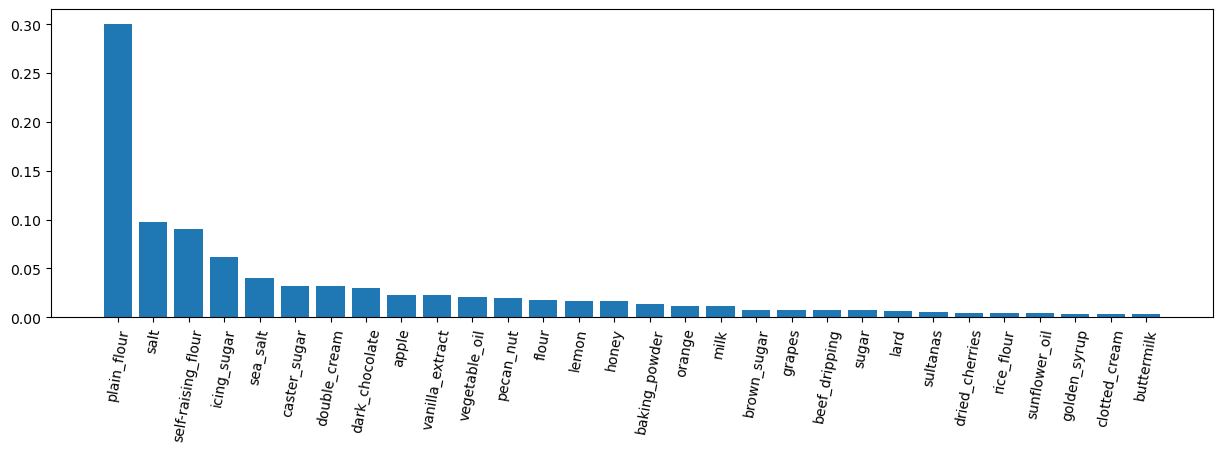

In [155]:
seed = ('plain_flour butter caster_sugar egg cocoa_powder banana').split(' ')
shuffle(seed)
seed_text = ' '.join(seed)
next_words = 1
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predict_x = model.predict(token_list, verbose=0)
    predicted=np.argmax(predict_x,axis=1)
    predicted_maxes=(-predict_x).argsort()[0][:30]
    x = list(map(sequence_to_text, [predicted_maxes]))[0]
    y = predict_x[0][predicted_maxes]
    plt.figure(figsize=(15,4))
    plt.bar(x,y)
    plt.xticks(rotation=80)
print(seed_text)

In [ ]:
#we don't want these common ingredients

garlic black_pepper pasta tomato tuna anchovies olive_oil onion


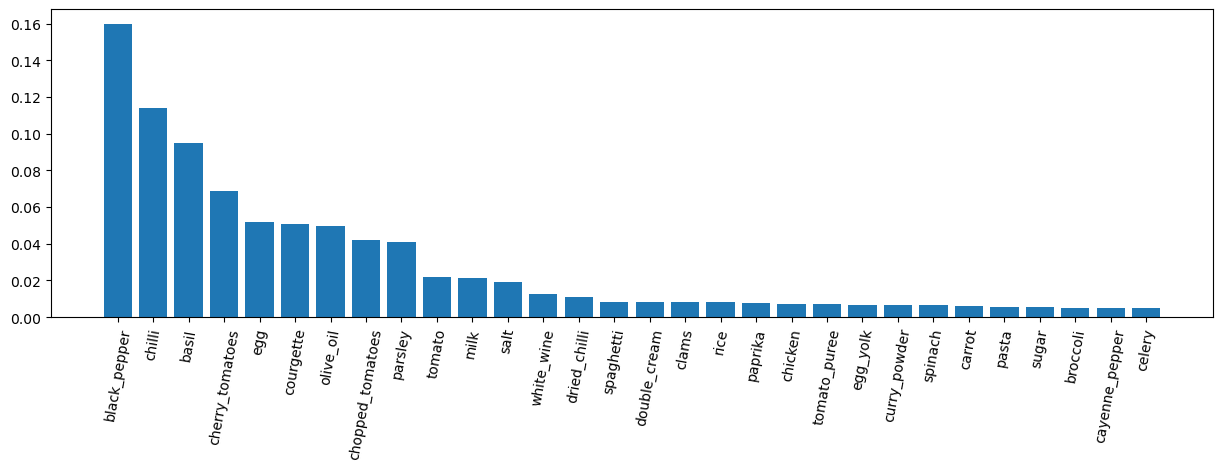

In [151]:
seed = ('tomato onion anchovies tuna olive_oil black_pepper garlic pasta').split(' ')
shuffle(seed)
seed_text = ' '.join(seed)
next_words = 1
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predict_x = model.predict(token_list, verbose=0)
    predicted=np.argmax(predict_x,axis=1)
    predicted_maxes=(-predict_x).argsort()[0][:30]
    x = list(map(sequence_to_text, [predicted_maxes]))[0]
    y = predict_x[0][predicted_maxes]
    plt.figure(figsize=(15,4))
    plt.bar(x,y)
    plt.xticks(rotation=80)
print(seed_text)

feta_cheese cherry_tomatoes olive_oil avocado white_fish


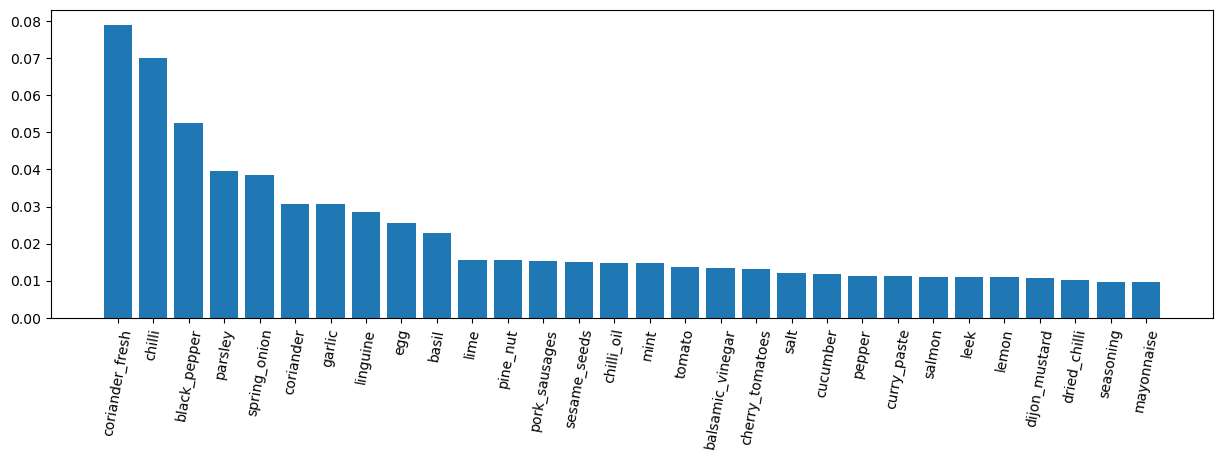

In [154]:
seed = ('white_fish feta_cheese cherry_tomatoes avocado olive_oil').split(' ')
shuffle(seed)
seed_text = ' '.join(seed)
next_words = 1
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predict_x = model.predict(token_list, verbose=0)
    predicted=np.argmax(predict_x,axis=1)
    predicted_maxes=(-predict_x).argsort()[0][:30]
    x = list(map(sequence_to_text, [predicted_maxes]))[0]
    y = predict_x[0][predicted_maxes]
    plt.figure(figsize=(15,4))
    plt.bar(x,y)
    plt.xticks(rotation=80)
print(seed_text)

#olive_oil cherry_tomatoes avocado feta_cheese white_fish
